# WeatherPy - Created by Mitty

## Import Dependencies

In [1]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import tkinter
import os
import gmaps
import math

# Google developer API key
from config import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Import API Keys

In [2]:
# Import API key
from api_keys import api_key

## Generate Cities List

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
random_cities_to_generate = 1500
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=random_cities_to_generate)
lngs = np.random.uniform(low=-180.000, high=180.000, size=random_cities_to_generate)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print (f'\nTotal no. of unique cities generated: {len(cities)}\n')
print (f'Make sure to change variable: "random_cities_to_generate" to have sufficient cities selected since we may not get data for all 500 ')


Total no. of unique cities generated: 603

Make sure to change variable: "random_cities_to_generate" to have sufficient cities selected since we may not get data for all 500 


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#lets define all Variables we need
cities_selected=[]
lat =[]
lon =[]
temp_max =[]
humidity = []
wind_speed = []
cloudiness = []
country = []
date = []
error = 0

#define units we want
units = "metric"
localtime = time.asctime( time.localtime(time.time()) )

print (f'-----------------------------\nBeginning Data Retrieval\n-----------------------------')
# window1 = tkinter.Tk()
# window1.title("Message from mitty")
# label = tkinter.Label(window1, text = "\nData Retrieval could take some time\n\n Close window to continue\n").pack()
# window1.mainloop()

#loop through all cities in our list: cities
for idx, city in enumerate(cities):    
    # Save config information and Build query URL
    url = "http://api.openweathermap.org/data/2.5/weather?"    
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    
    #check to see if the reponse has code 200. if it does not skip it
    if requests.get(query_url).status_code == 200:
        print (f'Processing Record {idx+1} of Set of {len(cities)} FOUND & ADDED: |{city}')
        response = requests.get(query_url).json()
        city
        cities_selected.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        temp_max.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    else:
        print (f'Processing Record {idx+1} of Set of {len(cities)} NOT FOUND: |{city}')

        

#print the stats for better understanding        
print (f'\n-----------------------------\nResults:\n-----------------------------')
print (f'Total no. of cities that we were able to retrieve data for: {len(cities_selected)} of {len(cities)} : {100*len(cities_selected)/len(cities)}%')
if (len(cities_selected)<500): 
    print (f'WARNING NOT ENOUGH CITIES IN DATASET. PLEASE INCREASE random_cities_to_generate AND RERUN ANALYSIS TO GET ATLEAST 500')
    error = 1
    
# window2 = tkinter.Tk()
# window2.title("Message from mitty")
# if error == 0:
#     label = tkinter.Label(window2, text = f'\nTotal no. of cities that we were able to retrieve data for: {len(cities_selected)} of {len(cities)} : {100*len(cities_selected)/len(cities):.2f}%\n').pack()
# else:
#     label = tkinter.Label(window2, text = f'\nWARNING NOT ENOUGH CITIES IN DATASET: {len(cities_selected)} of 500 needed\nPLEASE INCREASE random_cities_to_generate AND RERUN ANALYSIS TO GET ATLEAST 500').pack()
# window2.mainloop()

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set of 603 FOUND & ADDED: |gucheng
Processing Record 2 of Set of 603 FOUND & ADDED: |rikitea
Processing Record 3 of Set of 603 FOUND & ADDED: |pemba
Processing Record 4 of Set of 603 FOUND & ADDED: |alice springs
Processing Record 5 of Set of 603 FOUND & ADDED: |sao filipe
Processing Record 6 of Set of 603 FOUND & ADDED: |mago
Processing Record 7 of Set of 603 FOUND & ADDED: |takoradi
Processing Record 8 of Set of 603 FOUND & ADDED: |puerto ayora
Processing Record 9 of Set of 603 FOUND & ADDED: |beringovskiy
Processing Record 10 of Set of 603 FOUND & ADDED: |pacasmayo
Processing Record 11 of Set of 603 FOUND & ADDED: |luderitz
Processing Record 12 of Set of 603 FOUND & ADDED: |ancud
Processing Record 13 of Set of 603 FOUND & ADDED: |lujan
Processing Record 14 of Set of 603 NOT FOUND: |alotau
Processing Record 15 of Set of 603 FOUND & ADDED: |raudeberg
Processing Record 16 of Set 

Processing Record 136 of Set of 603 FOUND & ADDED: |chapais
Processing Record 137 of Set of 603 NOT FOUND: |bengkulu
Processing Record 138 of Set of 603 NOT FOUND: |yanchukan
Processing Record 139 of Set of 603 FOUND & ADDED: |mahebourg
Processing Record 140 of Set of 603 FOUND & ADDED: |shawinigan
Processing Record 141 of Set of 603 FOUND & ADDED: |gleisdorf
Processing Record 142 of Set of 603 FOUND & ADDED: |hilo
Processing Record 143 of Set of 603 FOUND & ADDED: |kamenka
Processing Record 144 of Set of 603 FOUND & ADDED: |monrovia
Processing Record 145 of Set of 603 FOUND & ADDED: |baykit
Processing Record 146 of Set of 603 FOUND & ADDED: |new norfolk
Processing Record 147 of Set of 603 FOUND & ADDED: |carnarvon
Processing Record 148 of Set of 603 FOUND & ADDED: |ocos
Processing Record 149 of Set of 603 FOUND & ADDED: |bredasdorp
Processing Record 150 of Set of 603 FOUND & ADDED: |palestine
Processing Record 151 of Set of 603 FOUND & ADDED: |roald
Processing Record 152 of Set of 603

Processing Record 271 of Set of 603 FOUND & ADDED: |upernavik
Processing Record 272 of Set of 603 FOUND & ADDED: |sao miguel do araguaia
Processing Record 273 of Set of 603 FOUND & ADDED: |gorontalo
Processing Record 274 of Set of 603 NOT FOUND: |hai phong
Processing Record 275 of Set of 603 FOUND & ADDED: |egvekinot
Processing Record 276 of Set of 603 FOUND & ADDED: |kurtamysh
Processing Record 277 of Set of 603 FOUND & ADDED: |chicama
Processing Record 278 of Set of 603 FOUND & ADDED: |saint-pierre
Processing Record 279 of Set of 603 FOUND & ADDED: |gaoual
Processing Record 280 of Set of 603 FOUND & ADDED: |avera
Processing Record 281 of Set of 603 FOUND & ADDED: |oakdale
Processing Record 282 of Set of 603 NOT FOUND: |korla
Processing Record 283 of Set of 603 FOUND & ADDED: |makakilo city
Processing Record 284 of Set of 603 FOUND & ADDED: |ilo
Processing Record 285 of Set of 603 FOUND & ADDED: |vanimo
Processing Record 286 of Set of 603 FOUND & ADDED: |camabatela
Processing Record 2

Processing Record 406 of Set of 603 FOUND & ADDED: |kyshtovka
Processing Record 407 of Set of 603 FOUND & ADDED: |sumbe
Processing Record 408 of Set of 603 FOUND & ADDED: |halifax
Processing Record 409 of Set of 603 NOT FOUND: |barbar
Processing Record 410 of Set of 603 FOUND & ADDED: |ostrovnoy
Processing Record 411 of Set of 603 FOUND & ADDED: |aplahoue
Processing Record 412 of Set of 603 FOUND & ADDED: |emerald
Processing Record 413 of Set of 603 FOUND & ADDED: |puerto madryn
Processing Record 414 of Set of 603 FOUND & ADDED: |piltene
Processing Record 415 of Set of 603 FOUND & ADDED: |kalmunai
Processing Record 416 of Set of 603 FOUND & ADDED: |constitucion
Processing Record 417 of Set of 603 FOUND & ADDED: |samana
Processing Record 418 of Set of 603 FOUND & ADDED: |tazmalt
Processing Record 419 of Set of 603 FOUND & ADDED: |chyhyryn
Processing Record 420 of Set of 603 FOUND & ADDED: |ambon
Processing Record 421 of Set of 603 FOUND & ADDED: |barcelos
Processing Record 422 of Set of

Processing Record 542 of Set of 603 FOUND & ADDED: |nantucket
Processing Record 543 of Set of 603 FOUND & ADDED: |scottsbluff
Processing Record 544 of Set of 603 NOT FOUND: |skage
Processing Record 545 of Set of 603 FOUND & ADDED: |palmer
Processing Record 546 of Set of 603 FOUND & ADDED: |eenhana
Processing Record 547 of Set of 603 FOUND & ADDED: |shetpe
Processing Record 548 of Set of 603 FOUND & ADDED: |hargeysa
Processing Record 549 of Set of 603 FOUND & ADDED: |wonthaggi
Processing Record 550 of Set of 603 FOUND & ADDED: |aberdeen
Processing Record 551 of Set of 603 FOUND & ADDED: |puerto carreno
Processing Record 552 of Set of 603 FOUND & ADDED: |vila velha
Processing Record 553 of Set of 603 FOUND & ADDED: |honningsvag
Processing Record 554 of Set of 603 FOUND & ADDED: |kisaran
Processing Record 555 of Set of 603 FOUND & ADDED: |wuwei
Processing Record 556 of Set of 603 FOUND & ADDED: |harper
Processing Record 557 of Set of 603 FOUND & ADDED: |christchurch
Processing Record 558 

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#lets create a dataframe to match City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
weather_dict = {
    "City": cities_selected,
    "Cloudiness": cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat": lat,
    "Lng":lon,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
      }
weather_data = pd.DataFrame(weather_dict)

# Write to Output File (CSV)
output_data_file = f'output_data/Cities_Data_{localtime}.csv'
weather_data.to_csv(output_data_file, index=False)

#Display dataframe
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,gucheng,100,CN,1559058811,86,32.27,111.65,13.83,1.63
1,rikitea,100,PF,1559058812,80,-23.12,-134.97,23.73,4.73
2,pemba,20,MZ,1559058812,88,-12.97,40.52,26.00,4.60
3,alice springs,0,AU,1559058813,75,-23.70,133.88,7.00,2.10
4,sao filipe,0,CV,1559058813,83,14.90,-24.50,23.63,5.51


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Plotting the cities selected

In [6]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

# Customize the size of the figure
figure_layout = {
    'width': '1000px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '2px',
    'margin': '0 auto 0 auto'
}

# Create the Layout
fig = gmaps.figure(layout=figure_layout)

# Assign the marker layer to cities
markers = gmaps.symbol_layer(weather_data[['Lat', 'Lng']], fill_color='green', stroke_color='green', scale=2)

# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='2px', wi…

### Latitude vs. Temperature Plot

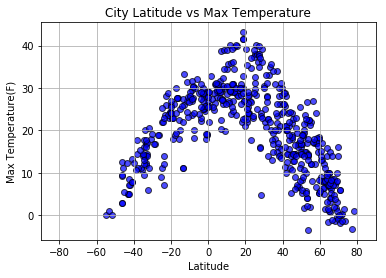

In [7]:
#Lets plot - Latitude vs. Temperature Plot
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylabel("Max Temperature(F)")
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o", facecolors="blue", alpha=0.7, edgecolors="black")
plt.grid()

plt.savefig(f'images/Lats_vs_Temps({localtime}).png')
plt.show()

### Binned Max Temp Plot

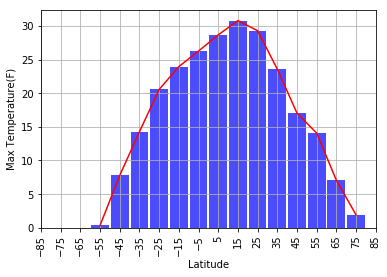

In [10]:
bins = [-90+10*i for i in range(19)]
group_names = [-90+10*i+5 for i in range(18)]
temp1 = weather_data
temp1["Binned Lat"] = pd.cut(temp1["Lat"], bins, labels=group_names)
temp1 = temp1.groupby("Binned Lat")

plt.xticks(group_names, rotation='vertical')
plt.xlim(-85,85)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.plot(group_names,temp1["Max Temp"].mean(), color = 'red')
plt.bar(group_names,temp1["Max Temp"].mean(), align='center', color ='blue', alpha=0.7, width=9)
plt.savefig(f'images/Lats_vs_Temps-Binned({localtime}).png')

### Heat map showing the distribution of highest average temperature

In [11]:
figure_layout = {
    'width': '1000px',
    'height': '700px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

# Create a max temp Heatmap layer
fig = gmaps.figure(layout=figure_layout)

#Create zone Lat Long and Heat
x_heat_map =[]
y_heat_map =[]
max_temp_plot =[]
heat_binned = temp1["Max Temp"].mean()


for idx,bin in enumerate(group_names):
    for i in range(-180,180,10):
        x_heat_map.append(float(bin))
        y_heat_map.append(float(i))
        max_temp_plot.append(heat_binned[idx])

        
locations = pd.DataFrame(list(zip(x_heat_map, y_heat_map)), columns =['Lat', 'Lng'])

max_temp_plot = [0 if math.isnan(x) else x for x in max_temp_plot]
if min(max_temp_plot)<0:
    max_temp_plot = max_temp_plot - min(max_temp_plot)

heat_layer = gmaps.heatmap_layer(locations, weights=max_temp_plot, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 50
heat_layer.point_radius = 10
fig.add_layer(markers)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='700px', margin='0 auto 0 auto', padding='1px', wi…

In [28]:
figure_layout = {
    'width': '2000px',
    'height': '2000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
# Create a max temp Heatmap layer
fig = gmaps.figure(figure_layout)

weather_data_adj = weather_data
weather_data_adj['Max Temp'] = weather_data['Max Temp'] -  weather_data['Max Temp'].min()

#Create zone Lat Long and Heat
heat_layer = gmaps.heatmap_layer(weather_data[['Lat', 'Lng']], weights=weather_data_adj['Max Temp'], 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 50
heat_layer.point_radius = 3

fig.add_layer(heat_layer)
#fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))

### Latitude vs. Humidity Plot

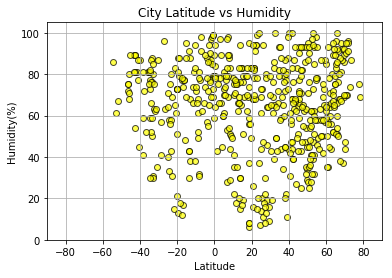

In [12]:
#Lets plot - Latitude vs. Humidity Plot
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(0,105)
plt.ylabel("Humidity(%)")
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker="o", facecolors="yellow", alpha=0.7, edgecolors="black")
plt.grid()

plt.savefig(f'images/Lats_vs_Humidity({localtime}).png')
plt.show()

In [15]:
figure_layout = {
    'width': '2000px',
    'height': '2000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
# Create a max temp Heatmap layer
fig = gmaps.figure(figure_layout)

weather_data_adj = weather_data
weather_data_adj['Max Temp'] = weather_data['Max Temp'] -  weather_data['Max Temp'].min()

#Create zone Lat Long and Heat
heat_layer = gmaps.heatmap_layer(weather_data[['Lat', 'Lng']], weights=weather_data_adj['Humidity'], 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)
#fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))

### Latitude vs. Cloudiness Plot

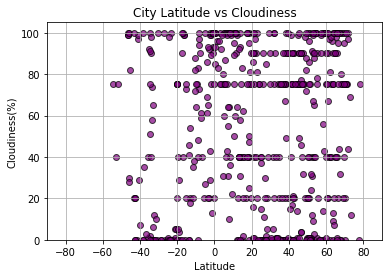

In [16]:
#Lets plot - Latitude vs. Cloudiness Plot
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(0,105)
plt.ylabel("Cloudiness(%)")
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker="o", facecolors="purple", alpha=0.7, edgecolors="black")
plt.grid()

plt.savefig(f'images/Lats_vs_Cloudiness({localtime}).png')
plt.show()

In [19]:
figure_layout = {
    'width': '2000px',
    'height': '2000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
# Create a max temp Heatmap layer
fig = gmaps.figure(figure_layout)

weather_data_adj = weather_data
weather_data_adj['Max Temp'] = weather_data['Max Temp'] -  weather_data['Max Temp'].min()

#Create zone Lat Long and Heat
heat_layer = gmaps.heatmap_layer(weather_data[['Lat', 'Lng']], weights=weather_data_adj['Cloudiness'], 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)
#fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))

### Latitude vs. Wind Speed Plot

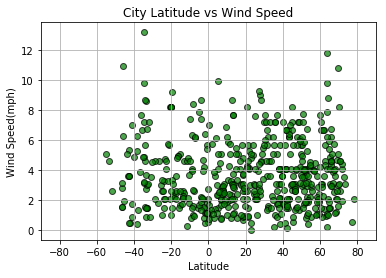

In [20]:
#Lets plot - Latitude vs. Wind Speed Plot
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylabel("Wind Speed(mph)")
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker="o", facecolors="green", alpha=0.7, edgecolors="black")
plt.grid()

plt.savefig(f'images/Lats_vs_WindSpeed({localtime}).png')
plt.show()

In [26]:
figure_layout = {
    'width': '1000px',
    'height': '700px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
# Create a max temp Heatmap layer
fig = gmaps.figure(figure_layout)

weather_data_adj = weather_data
weather_data_adj['Max Temp'] = weather_data['Max Temp'] -  weather_data['Max Temp'].min()

#Create zone Lat Long and Heat
heat_layer = gmaps.heatmap_layer(weather_data[['Lat', 'Lng']], weights=weather_data_adj['Wind Speed'], 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 5
heat_layer.point_radius = 3

fig.add_layer(heat_layer)
#fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))